In [1]:
import numpy as np 
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        #'weight' : 'bold',
        'size'   : 20}
plt.rc('figure', figsize=(16,9))
plt.rc('font', **font)  # pass in the font dict as kwargs
plt.rc('lines', lw=2)

<div style="background:#999900"> te falta la definición de TC ! </div>

In [2]:
TC = {'A': 75, 'B': 0, 'C': 50, 'D': 100}

In [3]:
Nx = 30
Ny = 30

beta = Nx/Ny
Nk = Nx*Ny

M = np.eye(Nk)
b = np.zeros((Nk, 1))

ccA = list(range(0, Nk, Nx))
ccB = list(range(0,Nx))
ccC = list(range(Nx-1, Nk, Ny))
ccD = list(range(Nk-Nx,Nk))

cc = {'TA':75, 'TB':100 , 'TC':50, 'TD':0}
cc_tipo = {'A':'temp','B':'temp','C':'temp','D':'temp'}

for k in range(Nk):
    if k==0:
        if cc_tipo['A']=='temp'  and cc_tipo['B'] == 'flujo':
            b[k] = TC['A']
        elif cc_tipo['B']=='temp'  and cc_tipo['A'] == 'flujo':
            b[k] = TC['B']
        else:
            b[k]= (TC['A']+TC['B'])/2
    elif k==(Nx-1): # En los vértices siempre nos quedamos con el borde que tiene temperatura fija.
        if cc_tipo['C']=='temp'  and cc_tipo['B'] == 'flujo':
            b[k] = TC['C']
        elif cc_tipo['B']=='temp'  and cc_tipo['C'] == 'flujo':
            b[k] = TC['B']
        else:
            b[k]= (TC['C']+TC['B'])/2
    elif k==Nx-1:
        print(k)
        b[k] = (cc['TB']+cc['TC'])/2
    
        
    elif k==(Nk-Nx-1):
        b[k] = (cc['TA']+cc['TD'])/2
    elif k==(Nk-1):
        b[k] = (cc['TD']+cc['TC'])/2
    elif k in ccA:
        b[k] = cc['TA']
    elif k in ccC:
        b[k] = cc['TD']
    elif k in ccB:
        b[k] = cc['TB']
    elif k in ccD:
        b[k] = cc['TC']
    else:
        M[k,k]= -2*(1+ beta**2)
        M[k,k-1]= 1
        M[k,k+1]= 1
        M[k,k-Nx]= beta**2
        M[k,k+Nx]= beta**2

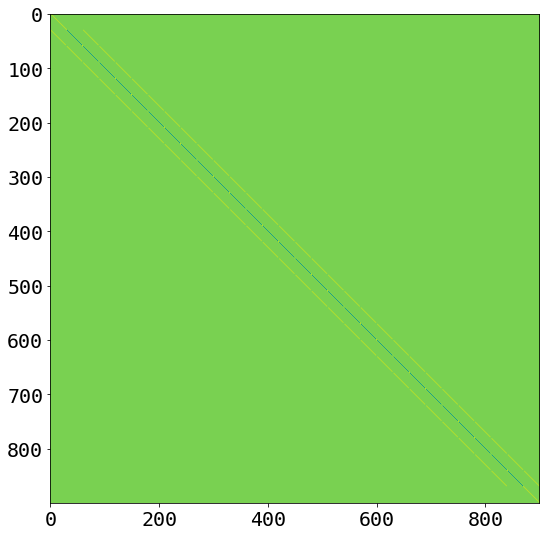

In [4]:
plt.imshow(M)

In [5]:
T = np.linalg.solve(M,b)
T = T.reshape((Nx,Ny)) 

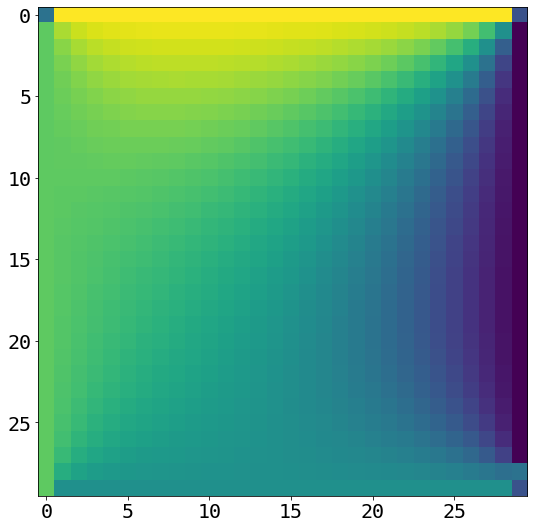

In [6]:
plt.imshow(T)

<div style="background:#999900">con el argumento 'origin' se puede invertir la orientac'on del dibujo</div>

Text(0, 0.5, 'j')

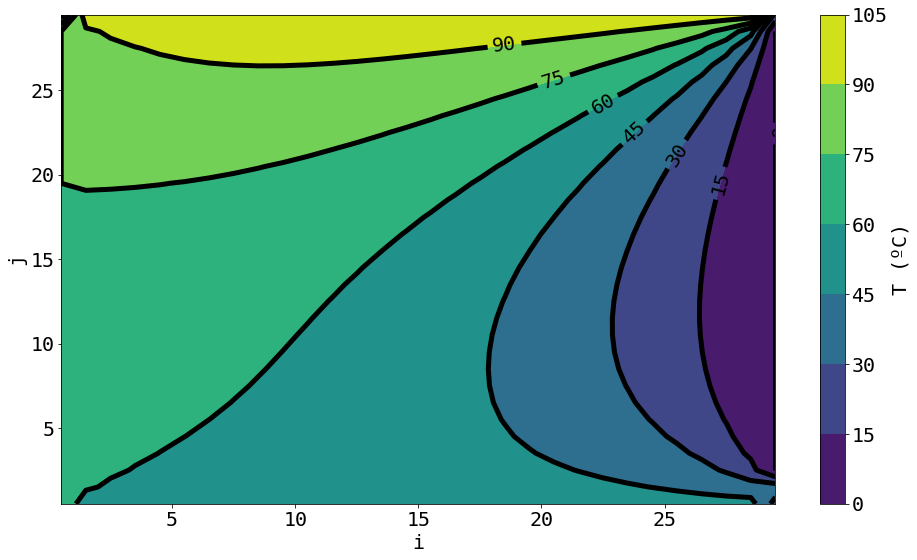

In [12]:
fig, ax = plt.subplots()
mappable = ax.contourf(T, origin='upper')
levels = ax.contour(T, colors='k', linewidths=5, origin='upper')
cbar = plt.colorbar(mappable)
cbar.set_label('T (ºC)')
ax.clabel(levels, )
ax.set_xlabel('i')
ax.set_ylabel('j')